In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dataframe_image as dfi
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 3)

In [30]:
df = pd.read_csv("stat.csv",sep=",")
df

,Method,Order,Puzzle_length,Solution_length,Visited_states,Calculated_states,Max_deep,Calculating_time
0,astr,hamm,1,1,2,3,1,0.068
1,astr,manh,1,1,2,3,1,0.125
2,bfs,DRLU,1,1,2,3,1,0.053
3,bfs,DRUL,1,1,2,3,1,0.050
4,bfs,LUDR,1,1,4,8,1,0.126
...,...,...,...,...,...,...,...,...
7429,dfs,LURD,7,19,519250,519262,20,7684.437
7430,dfs,RDLU,7,19,437,453,20,6.342
7431,dfs,RDUL,7,17,287808,287821,20,4266.735
7432,dfs,ULDR,7,-1,1354763,1354783,20,20000.010


In [31]:
df['Correct'] = df['Solution_length'].apply(lambda x : x != -1)
df

,Method,Order,Puzzle_length,Solution_length,Visited_states,Calculated_states,Max_deep,Calculating_time,Correct
0,astr,hamm,1,1,2,3,1,0.068,True
1,astr,manh,1,1,2,3,1,0.125,True
2,bfs,DRLU,1,1,2,3,1,0.053,True
3,bfs,DRUL,1,1,2,3,1,0.050,True
4,bfs,LUDR,1,1,4,8,1,0.126,True
...,...,...,...,...,...,...,...,...,...
7429,dfs,LURD,7,19,519250,519262,20,7684.437,True
7430,dfs,RDLU,7,19,437,453,20,6.342,True
7431,dfs,RDUL,7,17,287808,287821,20,4266.735,True
7432,dfs,ULDR,7,-1,1354763,1354783,20,20000.010,False


In [32]:
grouped = df.groupby(['Method'])['Correct'].sum()
grouped

Method
astr     826
bfs     3304
dfs     3130
Name: Correct, dtype: int64

In [33]:
grouped

Method
astr     826
bfs     3304
dfs     3130
Name: Correct, dtype: int64

<Axes: xlabel='Metoda', ylabel='Ilość rozwiązań'>

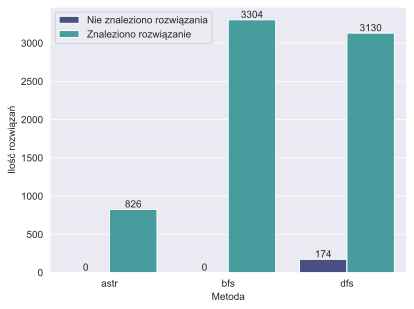

In [34]:
ax = sns.countplot(data=df, x='Method', hue='Correct',palette='mako')
plt.legend(labels=['Nie znaleziono rozwiązania','Znaleziono rozwiązanie'])
plt.xlabel('Metoda')
plt.ylabel('Ilość rozwiązań')
for container in ax.containers:
    ax.bar_label(container)
ax

In [35]:
df[df['Method'] == 'bfs'].groupby(['Order','Puzzle_length'])['Solution_length'].mean()

Order  Puzzle_length
DRLU   1                1.0
       2                2.0
       3                3.0
       4                4.0
       5                5.0
       6                6.0
       7                7.0
DRUL   1                1.0
       2                2.0
       3                3.0
       4                4.0
       5                5.0
       6                6.0
       7                7.0
LUDR   1                1.0
       2                2.0
       3                3.0
       4                4.0
       5                5.0
       6                6.0
       7                7.0
LURD   1                1.0
       2                2.0
       3                3.0
       4                4.0
       5                5.0
       6                6.0
       7                7.0
RDLU   1                1.0
       2                2.0
       3                3.0
       4                4.0
       5                5.0
       6                6.0
       7                7.0

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,1,2,3,4,5,6,7
DRUL,1,2,3,4,5,6,7
LUDR,1,2,3,4,5,6,7
LURD,1,2,3,4,5,6,7
RDLU,1,2,3,4,5,6,7
RDUL,1,2,3,4,5,6,7
ULDR,1,2,3,4,5,6,7
ULRD,1,2,3,4,5,6,7


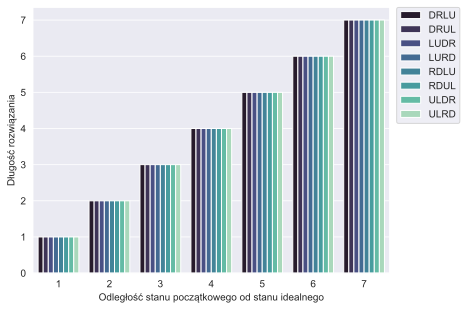

In [36]:
sns.barplot(x='Puzzle_length',y='Solution_length',data=df[df['Method'] == 'bfs'],hue='Order',palette='mako',errorbar=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Długość rozwiązania')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
gr = df[df['Method'] == 'bfs'].groupby(['Order','Puzzle_length'])['Solution_length'].mean()


tab = pd.crosstab(index=df[df['Method'] == 'bfs']['Order'], columns=df[df['Method'] == 'bfs']['Puzzle_length'],values=df['Solution_length'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego'])
tab
#dfi.export(tab,"table.png",table_conversion="matplotlib")

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,1.0,4.0,10.6,15.92,17.00,18.33,15.28
DRUL,1.0,6.5,10.6,16.42,17.04,18.48,15.38
LUDR,18.0,19.5,18.0,18.17,18.00,19.16,16.88
LURD,19.0,20.0,18.8,19.08,18.00,19.42,16.94
RDLU,1.0,6.5,10.6,16.42,17.04,18.48,15.38
RDUL,1.0,4.0,10.6,15.92,17.00,18.33,15.28
ULDR,19.0,20.0,18.8,19.08,18.00,19.42,16.94
ULRD,18.0,19.5,18.0,18.17,18.00,19.16,16.88


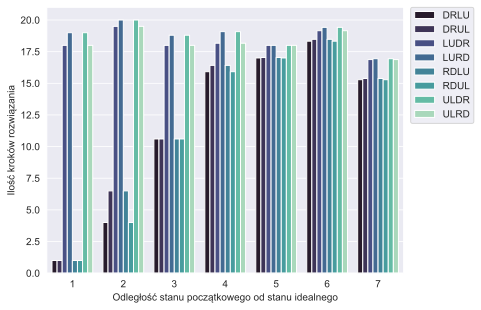

In [37]:
sns.barplot(x='Puzzle_length',y='Solution_length',data=df[df['Method'] == 'dfs'],hue='Order',errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość kroków rozwiązania')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'dfs']['Order'], columns=df[df['Method'] == 'dfs']['Puzzle_length'],values=df['Solution_length'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
hamm,1,2,3,4,5,6,7
manh,1,2,3,4,5,6,7


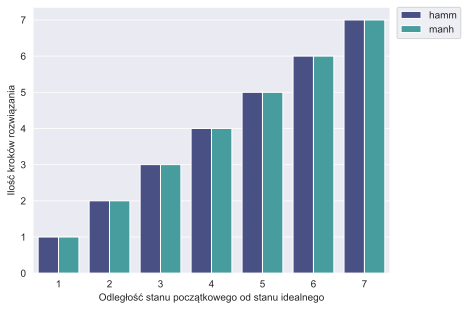

In [38]:
sns.barplot(x='Puzzle_length',y='Solution_length',data=df[df['Method'] == 'astr'],hue='Order',errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość kroków rozwiązania')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'astr']['Order'], columns=df[df['Method'] == 'astr']['Puzzle_length'],values=df['Solution_length'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,1,2,3,4,5,6,7
DRUL,1,2,3,4,5,6,7
LUDR,1,2,3,4,5,6,7
LURD,1,2,3,4,5,6,7
RDLU,1,2,3,4,5,6,7
RDUL,1,2,3,4,5,6,7
ULDR,1,2,3,4,5,6,7
ULRD,1,2,3,4,5,6,7


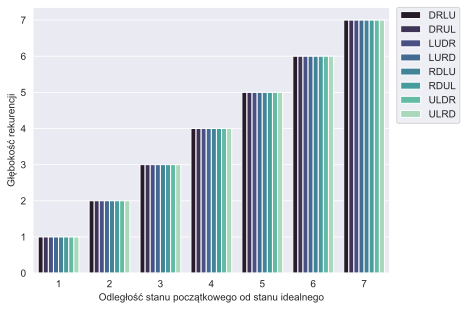

In [39]:
sns.barplot(x='Puzzle_length',y='Max_deep',data=df[df['Method'] == 'bfs'],hue='Order',palette='mako',errorbar=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Głębokość rekurencji')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'bfs']['Order'], columns=df[df['Method'] == 'bfs']['Puzzle_length'],values=df['Max_deep'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,1.0,4.0,11.2,17.25,18.83,19.46,19.75
DRUL,1.0,6.5,12.1,17.58,19.00,19.74,19.94
LUDR,20.0,20.0,20.0,20.00,20.00,20.00,20.00
LURD,20.0,20.0,20.0,20.00,20.00,20.00,20.00
RDLU,1.0,6.5,12.1,17.58,19.00,19.74,19.94
RDUL,1.0,4.0,11.2,17.25,18.83,19.46,19.75
ULDR,20.0,20.0,20.0,20.00,20.00,20.00,20.00
ULRD,20.0,20.0,20.0,20.00,20.00,20.00,20.00


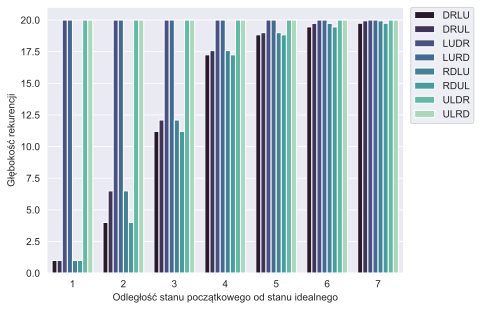

In [40]:
sns.barplot(x='Puzzle_length',y='Max_deep',data=df[df['Method'] == 'dfs'],hue='Order',errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Głębokość rekurencji')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'dfs']['Order'], columns=df[df['Method'] == 'dfs']['Puzzle_length'],values=df['Max_deep'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
hamm,1,2,3,4,5,6,7
manh,1,2,3,4,5,6,7


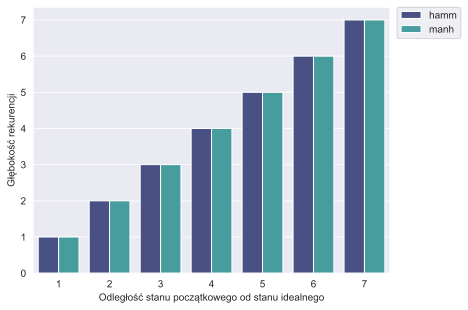

In [41]:
sns.barplot(x='Puzzle_length',y='Max_deep',data=df[df['Method'] == 'astr'],hue='Order',palette='mako',errorbar=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Głębokość rekurencji')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'astr']['Order'], columns=df[df['Method'] == 'astr']['Puzzle_length'],values=df['Max_deep'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,3.0,12.25,33.3,78.38,176.28,410.06,936.32
DRUL,3.0,12.25,33.3,78.38,176.28,410.15,936.58
LUDR,8.0,26.75,56.1,109.12,205.61,410.69,883.68
LURD,8.0,26.75,56.1,109.12,205.61,410.79,883.95
RDLU,3.0,12.25,33.3,78.38,176.28,410.15,936.58
RDUL,3.0,12.25,33.3,78.38,176.28,410.06,936.32
ULDR,8.0,26.75,56.1,109.12,205.61,410.79,883.95
ULRD,8.0,26.75,56.1,109.12,205.61,410.69,883.68


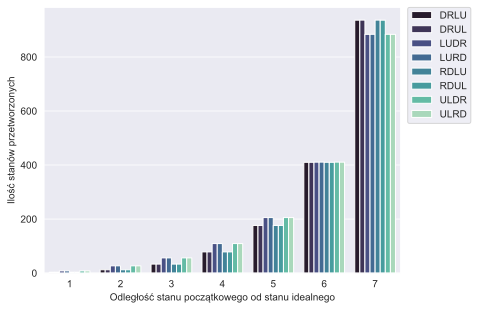

In [42]:
sns.barplot(x='Puzzle_length',y='Calculated_states',data=df[df['Method'] == 'bfs'],hue='Order' ,errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów przetworzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
#plt.savefig('fig.png',bbox_inches='tight',dpi=1200)
tab = pd.crosstab(index=df[df['Method'] == 'bfs']['Order'], columns=df[df['Method'] == 'bfs']['Puzzle_length'],values=df['Calculated_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,3.0,9.50,114.3,91211.46,276562.07,224140.20,454290.82
DRUL,3.0,5435.25,71788.0,163948.75,332770.19,295982.79,498021.05
LUDR,152933.5,135.50,89922.3,133626.29,344258.48,214661.45,440737.24
LURD,242215.0,71439.75,198469.0,252064.08,391871.00,298793.09,500032.42
RDLU,3.0,5435.25,71788.0,163948.75,332770.19,295938.63,496084.88
RDUL,3.0,9.50,114.3,91211.46,276562.07,224129.45,452603.42
ULDR,242215.0,71439.75,198469.0,252064.08,391871.00,298793.09,499963.68
ULRD,152933.5,135.50,89922.3,133626.29,344258.48,214661.45,440542.09


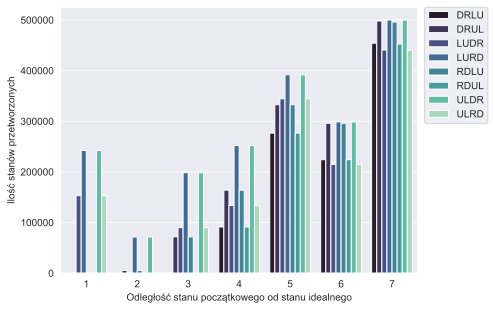

In [43]:
sns.barplot(x='Puzzle_length',y='Calculated_states',data=df[df['Method'] == 'dfs'],hue='Order' ,errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów przetworzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'dfs']['Order'], columns=df[df['Method'] == 'dfs']['Puzzle_length'],values=df['Calculated_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
hamm,3.0,5.5,8.0,10.75,13.30,16.97,22.42
manh,3.0,5.5,8.0,10.58,12.85,15.57,19.14


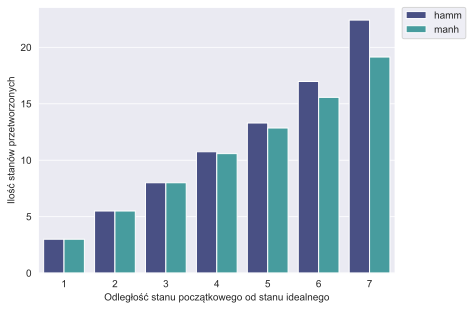

In [44]:
sns.barplot(x='Puzzle_length',y='Calculated_states',data=df[df['Method'] == 'astr'],hue='Order' ,errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów przetworzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'astr']['Order'], columns=df[df['Method'] == 'astr']['Puzzle_length'],values=df['Calculated_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,2.0,6.0,15.9,37.08,83.28,193.55,439.14
DRUL,2.0,6.0,15.9,37.08,83.28,193.59,439.26
LUDR,4.0,12.0,26.7,51.42,97.06,193.82,414.62
LURD,4.0,12.0,26.7,51.42,97.06,193.86,414.74
RDLU,2.0,6.0,15.9,37.08,83.28,193.59,439.26
RDUL,2.0,6.0,15.9,37.08,83.28,193.55,439.14
ULDR,4.0,12.0,26.7,51.42,97.06,193.86,414.74
ULRD,4.0,12.0,26.7,51.42,97.06,193.82,414.62


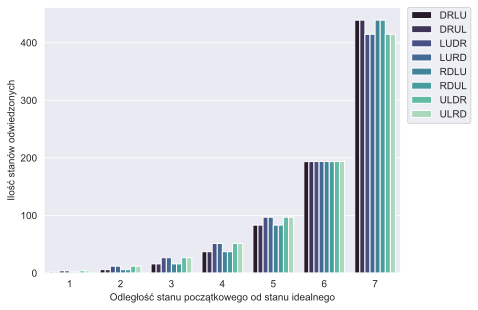

In [45]:
ax = sns.barplot(x='Puzzle_length',y='Visited_states',data=df[df['Method'] == 'bfs'],hue='Order' ,errorbar=None, palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów odwiedzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
ax
tab = pd.crosstab(index=df[df['Method'] == 'bfs']['Order'], columns=df[df['Method'] == 'bfs']['Puzzle_length'],values=df['Visited_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,2.0,5.00,103.6,91196.00,276546.26,224123.50,454275.10
DRUL,2.0,5429.50,71778.2,163933.96,332755.33,295967.12,498005.67
LUDR,152919.0,119.25,89908.3,133612.83,344245.69,214647.34,440723.93
LURD,242202.0,71424.75,198455.4,252051.83,391858.78,298780.19,500019.71
RDLU,2.0,5429.50,71778.2,163933.96,332755.33,295922.99,496069.42
RDUL,2.0,5.00,103.6,91196.00,276546.26,224112.78,452587.61
ULDR,242202.0,71424.75,198455.4,252051.83,391858.78,298780.19,499950.96
ULRD,152919.0,119.25,89908.3,133612.83,344245.69,214647.34,440528.79


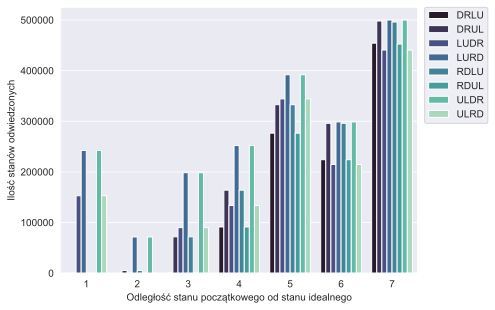

In [46]:
sns.barplot(x='Puzzle_length',y='Visited_states',data=df[df['Method'] == 'dfs'],hue='Order' ,errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów odwiedzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'dfs']['Order'], columns=df[df['Method'] == 'dfs']['Puzzle_length'],values=df['Visited_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
hamm,2.0,3.0,4.0,5.08,6.26,7.93,10.34
manh,2.0,3.0,4.0,5.00,6.07,7.35,8.96


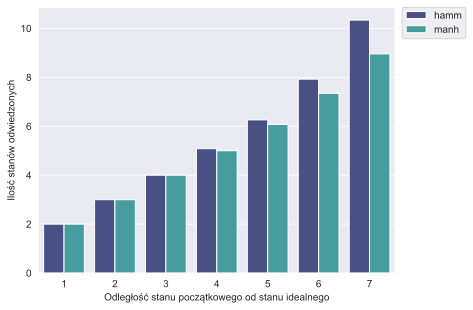

In [47]:
sns.barplot(x='Puzzle_length',y='Visited_states',data=df[df['Method'] == 'astr'],hue='Order' ,errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów odwiedzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'astr']['Order'], columns=df[df['Method'] == 'astr']['Puzzle_length'],values=df['Visited_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,0.05,0.23,0.51,1.11,2.48,5.76,12.71
DRUL,0.05,0.23,0.51,1.11,2.48,5.75,12.68
LUDR,0.12,0.43,0.82,1.53,2.93,5.81,12.04
LURD,0.13,0.44,0.82,1.52,2.95,5.81,12.09
RDLU,0.05,0.23,0.51,1.11,2.49,5.82,12.72
RDUL,0.05,0.23,0.52,1.11,2.50,5.78,12.73
ULDR,0.13,0.43,0.81,1.51,2.98,5.76,12.04
ULRD,0.13,0.42,0.81,1.52,2.95,5.79,12.02


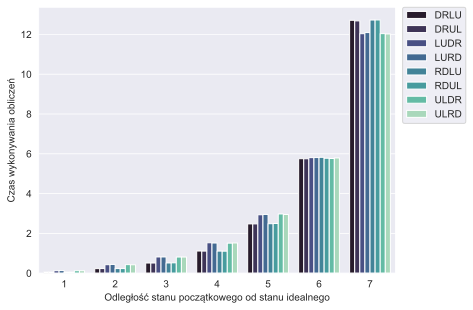

In [48]:
sns.barplot(x='Puzzle_length',y='Calculating_time',data=df[df['Method'] == 'bfs'],hue='Order' ,errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Czas wykonywania obliczeń')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'bfs']['Order'], columns=df[df['Method'] == 'bfs']['Puzzle_length'],values=df['Calculating_time'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
DRLU,0.05,0.16,1.67,1345.89,4103.34,3314.53,6718.51
DRUL,0.05,75.41,1061.68,2431.34,4946.27,4377.97,7356.28
LUDR,2255.09,1.99,1319.53,1973.93,5096.82,3178.43,6525.40
LURD,3596.37,1038.06,2918.32,3720.61,5810.23,4421.30,7399.24
RDLU,0.05,75.11,1061.07,2437.63,4963.64,4403.47,7403.04
RDUL,0.05,0.16,1.68,1335.77,4089.20,3305.04,6755.74
ULDR,3561.05,1035.46,2921.91,3725.80,5796.31,4422.83,7406.13
ULRD,2272.90,1.95,1331.20,1975.83,5105.83,3188.12,6537.49


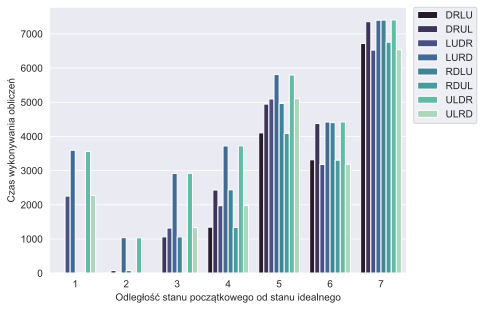

In [49]:
sns.barplot(x='Puzzle_length',y='Calculating_time',data=df[df['Method'] == 'dfs'],hue='Order' ,errorbar=None,palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Czas wykonywania obliczeń')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'dfs']['Order'], columns=df[df['Method'] == 'dfs']['Puzzle_length'],values=df['Calculating_time'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
hamm,0.07,0.12,0.21,0.26,0.30,0.37,0.46
manh,0.12,0.21,0.36,0.46,0.52,0.62,0.75


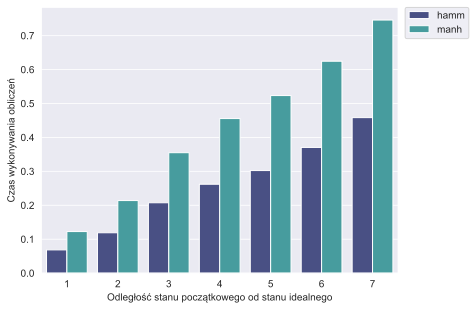

In [50]:
sns.barplot(x='Puzzle_length',y='Calculating_time',data=df[df['Method'] == 'astr'],hue='Order' ,errorbar=None,palette='mako')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Czas wykonywania obliczeń')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df[df['Method'] == 'astr']['Order'], columns=df[df['Method'] == 'astr']['Puzzle_length'],values=df['Calculating_time'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
astr,0.10,0.17,0.28,0.36,0.41,0.50,0.60
bfs,0.09,0.33,0.66,1.32,2.72,5.78,12.38
dfs,1460.70,278.54,1327.13,2368.35,4988.96,3826.46,7012.73


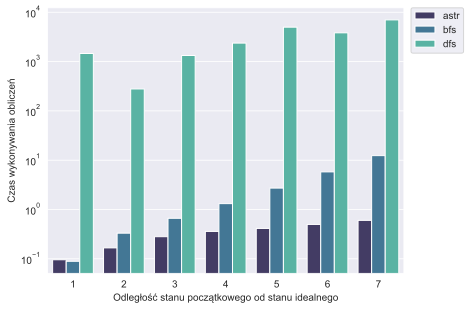

In [51]:
ax = sns.barplot(x='Puzzle_length',y='Calculating_time',data=df,hue='Method' ,errorbar=None,palette='mako')
ax.set_yscale('log')
ax
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Czas wykonywania obliczeń')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df['Method'], columns=df['Puzzle_length'],values=df['Calculating_time'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
astr,1.00,2.0,3.0,4.0,5.00,6.00,7.00
bfs,1.00,2.0,3.0,4.0,5.00,6.00,7.00
dfs,9.75,12.5,14.5,17.4,17.51,18.85,16.12


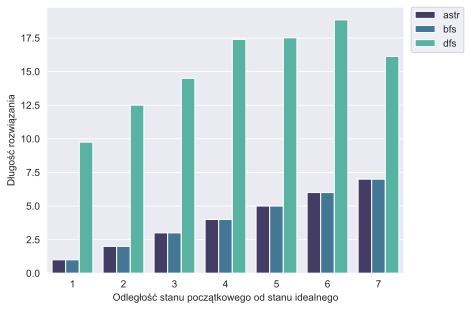

In [52]:
ax = sns.barplot(x='Puzzle_length',y='Solution_length',data=df,hue='Method' ,errorbar=None,palette='mako')
ax
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Długość rozwiązania')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df['Method'], columns=df['Puzzle_length'],values=df['Solution_length'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
astr,2.00,3.00,4.00,5.04,6.17,7.64,9.65
bfs,3.00,9.00,21.30,44.25,90.17,193.71,426.94
dfs,98781.25,19244.62,90061.38,160198.66,336351.51,258372.68,472770.15


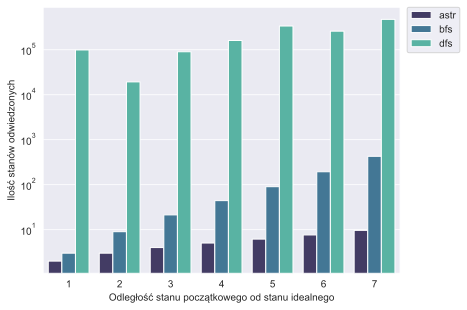

In [53]:
ax = sns.barplot(x='Puzzle_length',y='Visited_states',data=df,hue='Method' ,errorbar=None,palette='mako')
ax.set_yscale('log')
ax
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów odwiedzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df['Method'], columns=df['Puzzle_length'],values=df['Visited_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
astr,3.00,5.5,8.0,10.67,13.07,16.27,20.78
bfs,5.50,19.5,44.7,93.75,190.94,410.42,910.13
dfs,98788.62,19255.0,90073.4,160212.65,336365.44,258387.52,472784.45


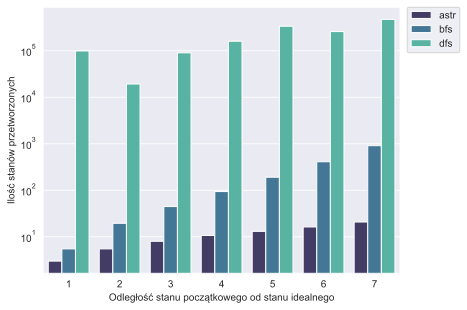

In [54]:
ax = sns.barplot(x='Puzzle_length',y='Calculated_states',data=df,hue='Method' ,errorbar=None,palette='mako')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Ilość stanów przetworzonych')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
ax
tab = pd.crosstab(index=df['Method'], columns=df['Puzzle_length'],values=df['Calculated_states'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab

Odległość stanu początkowego od stanu idealnego,1,2,3,4,5,6,7
Porządek,,,,,,,
astr,1.0,2.00,3.00,4.00,5.00,6.0,7.00
bfs,1.0,2.00,3.00,4.00,5.00,6.0,7.00
dfs,10.5,12.62,15.82,18.71,19.46,19.8,19.92


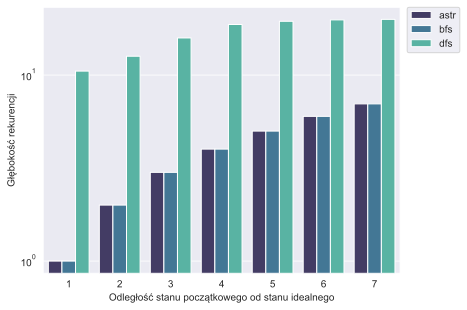

In [55]:
ax = sns.barplot(x='Puzzle_length',y='Max_deep',data=df,hue='Method' ,errorbar=None,palette='mako')
ax.set_yscale('log')
ax
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Głębokość rekurencji')
plt.xlabel('Odległość stanu początkowego od stanu idealnego')
tab = pd.crosstab(index=df['Method'], columns=df['Puzzle_length'],values=df['Max_deep'],aggfunc=np.mean,rownames=['Porządek'],colnames=['Odległość stanu początkowego od stanu idealnego']).round(2)
tab